In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import plotly.graph_objects as go
import requests
import json
import glob
import datetime
import plotly.express as px
from config import api_key
from config import mapbox_token
from calendar import monthrange
from urllib.request import urlopen


# Data pulled from U.S. Fish & Wildlife Service
# https://ecos.fws.gov/ecp/report/species-listings-by-tax-group?statusCategory=Listed&groupName=Birds
endangered_bird_data_to_load = "Resources/endangered_birds.csv"
endangered_df = pd.read_csv(endangered_bird_data_to_load)

recent_bird_sightings_to_load = "Resources/recent_bird_sightings.csv"
recent_birds_df = pd.read_csv(recent_bird_sightings_to_load)

autumn_birds_us_to_load = "Resources/birds_usa.csv"
birds_usa_df = pd.read_csv(autumn_birds_us_to_load)

endangered_tx_fall_to_load = "Resources/endangered_tx_fall.csv"
endangered_tx_fall_df = pd.read_csv(endangered_tx_fall_to_load)

In [3]:
regions = {
    "AL": 4,
    "AK": 7,
    "AZ": 2,
    "AR": 4,
    "CA": 8,
    "CO": 6,
    "CT": 5,
    "DC": 5,
    "DE": 5,
    "FL": 4,
    "GA": 4,
    "HI": 1,
    "ID": 6,
    "IL": 3,
    "IN": 3,
    "IA": 3,
    "KS": 6,
    "KY": 4,
    "LA": 4,
    "ME": 5,
    "MD": 5,
    "MA": 5,
    "MI": 3,
    "MN": 3,
    "MS": 4,
    "MO": 3,
    "MT": 6,
    "NE": 6,
    "NV": 8,
    "NH": 5,
    "NJ": 5,
    "NM": 2,
    "NY": 5,
    "NC": 4,
    "ND": 6,
    "OH": 3,
    "OK": 2,
    "OR": 1,
    "PA": 5,
    "RI": 5,
    "SC": 4,
    "SD": 6,
    "TN": 4,
    "TX": 2,
    "UT": 6,
    "VT": 5,
    "VA": 5,
    "WA": 1,
    "WV": 5,
    "WI": 3,
    "WY": 6,
}


regions_df = pd.DataFrame.from_dict(regions, orient="index", columns=["Region"])
regions_df["State"] = regions_df.index

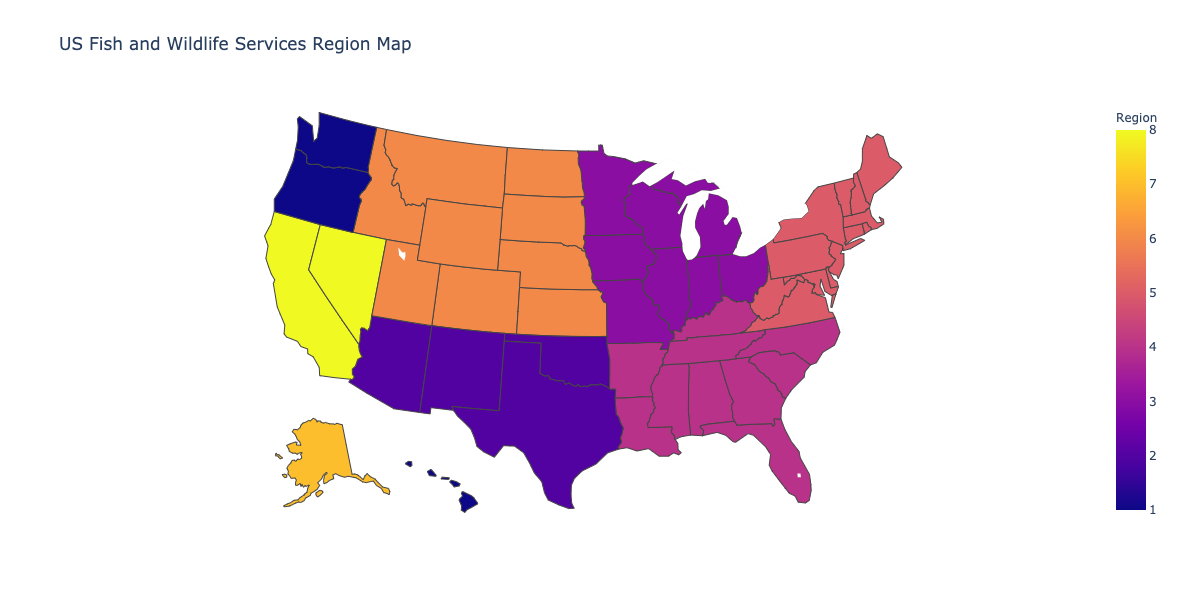

In [4]:
fig = px.choropleth(
    regions_df,
    locations="State",
    locationmode="USA-states",
    color=regions_df["Region"],
    scope="usa",
    color_discrete_sequence="smoker",
    hover_name=regions_df.index,
    hover_data={"Region": True, "State": False},
    width=1000,
    height=600,
    title="US Fish and Wildlife Services Region Map",
)
fig.show()

### Number of endangered bird that can be found in each US Fish and Wildlife Service Region.

In [5]:
endangered_df["Region  "].value_counts()

1    50
4    22
2    12
8    10
7     4
5     3
6     1
3     1
Name: Region  , dtype: int64

### Requested all bird sightings in the US that have been logged over the last 7 days.
#### This data will be merged with endangered species list to show only the birds that are listed as endangered or threatened.

### Recent Bird DataFrame Shows all of the birds that have been sighted in the past 7 days.

In [6]:
recent_birds_df

Unnamed: 0 speciesCode                     comName  \
0             0      amwpel      American White Pelican   
1             1      turvul              Turkey Vulture   
2             2      rethaw             Red-tailed Hawk   
3             3      whtkit           White-tailed Kite   
4             4     norhar2            Northern Harrier   
..          ...         ...                         ...   
979         979     cuckoo3  cuckoo sp. (Cuculidae sp.)   
980         980     procel2            Procellariid sp.   
981         981     towshe2         Newell's Shearwater   
982         982     hawpet1             Hawaiian Petrel   
983         983      bufpar    Turquoise-fronted Parrot   

                       sciName      locId  \
0    Pelecanus erythrorhynchos  L12395856   
1               Cathartes aura  L12395856   
2            Buteo jamaicensis  L12395856   
3              Elanus leucurus  L12395856   
4             Circus hudsonius  L12395856   
..                         ...        ...   
979              Cuculidae sp.    L880645   
980         Procellariidae sp.  L12358210   
981           Puffinus newelli   L7991696   
982   Pterodroma sandwichensis   L7991696   
983            Amazona aestiva   L4093801   

                                               locName             obsDt  \
0    3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...  2020-09-30 12:18   
1    3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...  2020-09-30 12:18   
2    3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...  2020-09-30 12:18   
3    3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...  2020-09-30 12:18   
4    3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...  2020-09-30 12:18   
..                                                 ...               ...   
979                           Michaux SF--Camp Michaux  2020-09-24 07:26   
980  88-131 Kai Ave, Captain Cook US-HI 19.20455, -...  2020-09-24 06:29   
981                         Glass Beach Cliff Seawatch  2020-09-23 18:47   
982                         Glass Beach Cliff Seawatch  2020-09-23 18:47   
983  Parrot roost--E. Washington Blvd and Fair Oaks...  2020-09-23 18:17   

     howMany        lat         lng  obsValid  obsReviewed  locationPrivate  \
0        5.0  36.992302 -121.496236      True        False             True   
1        4.0  36.992302 -121.496236      True        False             True   
2        1.0  36.992302 -121.496236      True        False             True   
3        1.0  36.992302 -121.496236      True        False             True   
4        1.0  36.992302 -121.496236      True        False             True   
..       ...        ...         ...       ...          ...              ...   
979      1.0  40.037206  -77.338545      True         True            False   
980      1.0  19.204553 -155.903710      True        False             True   
981      4.0  21.896600 -159.582836      True        False             True   
982      1.0  21.896600 -159.582836      True        False             True   
983      1.0  34.169106 -118.150358      True        False            False   

         subId  
0    S74233393  
1    S74233393  
2    S74233393  
3    S74233393  
4    S74233393  
..         ...  
979  S73994106  
980  S74005745  
981  S73986187  
982  S73986187  
983  S73983066  

[984 rows x 14 columns]

### Merging endangered bird DataFrame with recent sightings DataFrame to show recent endangered bird sightings.
** Note: There were somebird sightings that did not include the "howMany" field. For those sightings, I changed the blank field to one because one would assume that someone reported seeing zero birds.

In [7]:
endangered_recent_df = endangered_df.merge(
    recent_birds_df, left_on="Scientific Name", right_on="sciName"
)
endangered_recent_df.fillna(1, inplace=True)
endangered_recent_df

Scientific Name             Common Name  \
0    Gymnogyps californianus       California condor   
1    Gymnogyps californianus       California condor   
2             Grus americana          Whooping crane   
3             Grus americana          Whooping crane   
4             Grus americana          Whooping crane   
5             Grus americana          Whooping crane   
6            Anas wyvilliana  Hawaiian (=koloa) Duck   
7   Pterodroma sandwichensis         Hawaiian petrel   
8         Mycteria americana              Wood stork   
9         Charadrius melodus           Piping Plover   
10        Charadrius melodus           Piping Plover   
11   Aphelocoma coerulescens       Florida scrub-jay   
12  Brachyramphus marmoratus        Marbled murrelet   
13       Coccyzus americanus    Yellow-billed Cuckoo   
14         Drepanis coccinea                  `I`iwi   

                                         Where Listed  Region    \
0   U.S.A. only, except where listed as an experim...         8   
1   U.S.A. (specific portions of Arizona, Nevada, ...         8   
2   Wherever found, except where listed as an expe...         2   
3   U.S.A. (CO, ID, FL, NM, UT, and the western ha...         4   
4   U.S.A. (AL, AR, CO, FL, GA, ID, IL, IN, IA, KY...         2   
5                      U.S.A (Southwestern Louisiana)         4   
6                                      Wherever found         1   
7                                      Wherever found         1   
8                              AL, FL, GA, MS, NC, SC         4   
9   [Great Lakes watershed DPS] - Great Lakes, wat...         3   
10  [Atlantic Coast and Northern Great Plains popu...         5   
11                                     Wherever found         4   
12                                U.S.A. (CA, OR, WA)         1   
13                                   Western U.S. DPS         2   
14                                     Wherever found         1   

                      ESA Listing Status    Unnamed: 0 speciesCode  \
0                               Endangered         740      calcon   
1   Experimental Population, Non-Essential         740      calcon   
2                               Endangered         928      whocra   
3   Experimental Population, Non-Essential         928      whocra   
4   Experimental Population, Non-Essential         928      whocra   
5   Experimental Population, Non-Essential         928      whocra   
6                               Endangered         919      hawduc   
7                               Endangered         982     hawpet1   
8                               Threatened         128      woosto   
9                               Endangered         262      pipplo   
10                              Threatened         262      pipplo   
11                              Threatened         265      flsjay   
12                              Threatened         696      marmur   
13                              Threatened         100      yebcuc   
14                              Threatened         956        iiwi   

                 comName                   sciName      locId  \
0      California Condor   Gymnogyps californianus    L851680   
1      California Condor   Gymnogyps californianus    L851680   
2         Whooping Crane            Grus americana  L12371400   
3         Whooping Crane            Grus americana  L12371400   
4         Whooping Crane            Grus americana  L12371400   
5         Whooping Crane            Grus americana  L12371400   
6          Hawaiian Duck           Anas wyvilliana   L1169080   
7        Hawaiian Petrel  Pterodroma sandwichensis   L7991696   
8             Wood Stork        Mycteria americana   L2437906   
9          Piping Plover        Charadrius melodus    L127422   
10         Piping Plover        Charadrius melodus    L127422   
11     Florida Scrub-Jay   Aphelocoma coerulescens    L278595   
12      Marbled Murrelet  Brachyramphus marmoratus  L12375405   
13  Yellow-b

In [8]:
# Setting MapBox token.
px.set_mapbox_access_token(mapbox_token)

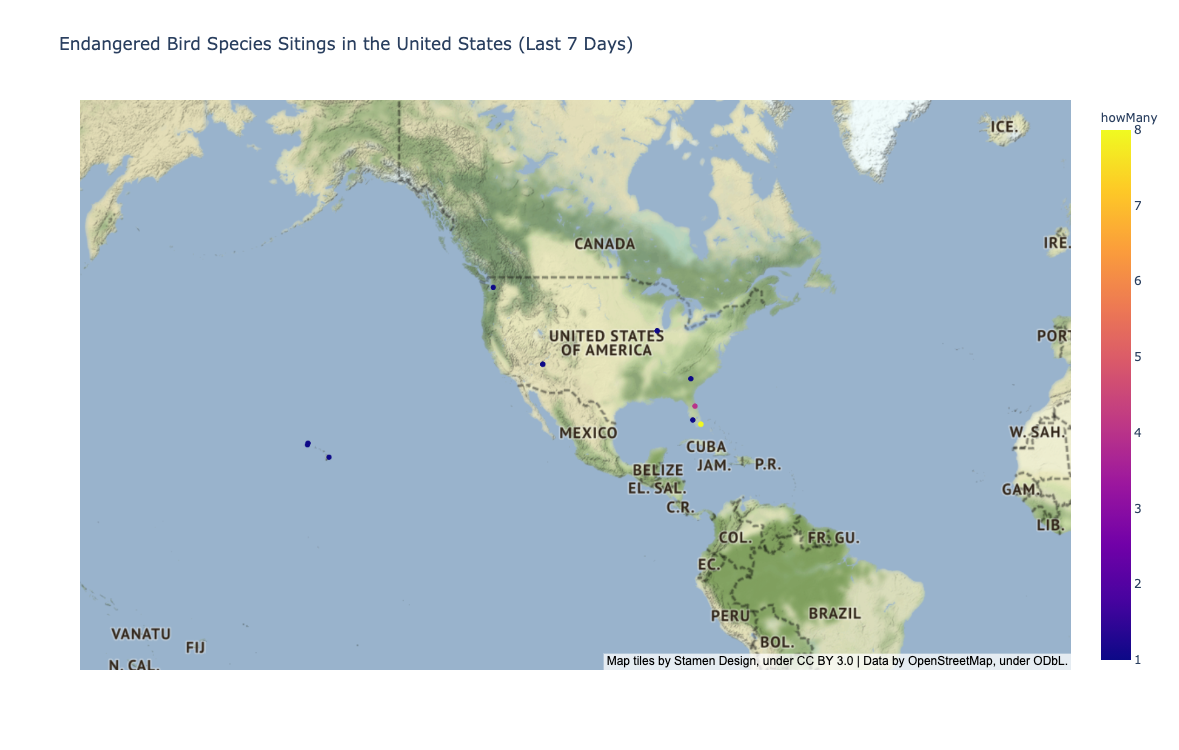

In [9]:
# Generating scatter map.
fig = px.scatter_mapbox(
    endangered_recent_df,
    lat="lat",
    lon="lng",
    color="howMany",
    hover_data=[
        "Common Name",
        "Scientific Name",
        "Where Listed",
        "locName",
        "Region  ",
    ],
    title="Endangered Bird Species Sitings in the United States (Last 7 Days)",
    height=750,
    mapbox_style="stamen-terrain",
    zoom=1.8,
)
fig.show()

### Now we are going to look at endangered bird sightings for the first day of Autumn and see how these sightings have changed over the years.

![Endangered Header](Resources/Images/Endangered_Bird_Header.png)

#### Pulling Bird Sightings across the entire US on the first day of Autumn and Filtering DataFrame to show only Endangered Bird Sightings

In [10]:
birds_usa_df.fillna(1, inplace=True)
birds_usa_df

Unnamed: 0             Common Name            Scientific Name  \
0              0     Eastern Screech-Owl             Megascops asio   
1              1    Black-bellied Plover       Pluvialis squatarola   
2              2           shorebird sp.        Charadriiformes sp.   
3              3          Eastern Phoebe            Sayornis phoebe   
4              4        Common Nighthawk           Chordeiles minor   
...          ...                     ...                        ...   
6492        6492    Prothonotary Warbler        Protonotaria citrea   
6493        6493   Black-headed Grosbeak  Pheucticus melanocephalus   
6494        6494          Lazuli Bunting           Passerina amoena   
6495        6495         Painted Bunting            Passerina ciris   
6496        6496  Yellow-billed Cardinal          Paroaria capitata   

          Date Sighted                              Location Name  \
0     2020-09-22 23:54                       Sommer Park Preserve   
1     2020-09-22 23:46                   Park Point--Sailing Club   
2     2020-09-22 23:46                   Park Point--Sailing Club   
3     2020-09-22 23:46                   Park Point--Sailing Club   
4     2020-09-22 23:45                             Stewart Corner   
...                ...                                        ...   
6492        2000-09-22                     Leesylvania State Park   
6493        2000-09-22                               Mt. Davidson   
6494        2000-09-22     Desert NWR--Corn Creek (Field Station)   
6495        2000-09-22  ULL Experimental Farm (restricted access)   
6496        2000-09-22                      Mauna Kea Golf Course   

      Num Sighted   Latitude   Longitude  year  
0             1.0  40.411375  -74.775610  2020  
1             8.0  46.731676  -92.056176  2020  
2             1.0  46.731676  -92.056176  2020  
3             3.0  46.731676  -92.056176  2020  
4             1.0  41.899314  -79.655270  2020  
...           ...        ...         ...   ...  
6492          1.0  38.589809  -77.251745  2000  
6493          2.0  37.738370 -122.453399  2000  
6494          1.0  36.438797 -115.359566  2000  
6495          5.0  30.093489  -91.870032  2000  
6496          1.0  20.011036 -155.817204  2000  

[6497 rows x 9 columns]

#### Creating a list of all of the birds that are classified as endangered by the US Dept. of Fish and Wildlife Services.

In [11]:
endangered_usa_list = endangered_df["Scientific Name"].to_list()

In [12]:
# Filtering DataFrame to show only birds that are on the endangered list.
endangered_usa_fall_df = birds_usa_df[
    birds_usa_df["Scientific Name"].isin(endangered_usa_list)
]
endangered_usa_fall_df

Unnamed: 0           Common Name           Scientific Name  \
355          355  Yellow-billed Cuckoo       Coccyzus americanus   
376          376            Wood Stork        Mycteria americana   
421          421         Piping Plover        Charadrius melodus   
546          546     California Condor   Gymnogyps californianus   
576          576      Marbled Murrelet  Brachyramphus marmoratus   
...          ...                   ...                       ...   
6013        6013     California Condor   Gymnogyps californianus   
6046        6046            Wood Stork        Mycteria americana   
6163        6163      Marbled Murrelet  Brachyramphus marmoratus   
6394        6394  Yellow-billed Cuckoo       Coccyzus americanus   
6419        6419        Whooping Crane            Grus americana   

          Date Sighted                                      Location Name  \
355   2020-09-22 18:39                                        Woodman Fen   
376   2020-09-22 18:32            Cumberland Island, High Point (PRIVATE)   
421   2020-09-22 18:20           Galveston--8 mile Beach/Sunny Beach area   
546   2020-09-22 17:14                     Glen Canyon NRA--Navajo Bridge   
576   2020-09-22 16:54                           Boiler Bay State Wayside   
...                ...                                                ...   
6013        2005-09-22                    California - Monterey - Big Sur   
6046  2000-09-22 18:15                           Big Black River and I-20   
6163  2000-09-22 14:45  Glacier Bay NP--Icy Strait (@mouth of Glacier ...   
6394  2000-09-22 06:20                      Cape Island--Higbee Beach WMA   
6419        2000-09-22                                    Three Lakes WMA   

      Num Sighted   Latitude   Longitude  year  
355           1.0  39.730677  -84.126048  2020  
376           5.0  30.915645  -81.420958  2020  
421           1.0  29.234920  -94.882994  2020  
546           8.0  36.817170 -111.630149  2020  
576           4.0  44.828817 -124.065900  2020  
...           ...        ...         ...   ...  
6013          1.0  36.264654 -121.801049  2005  
6046          1.0  32.353300  -90.630199  2000  
6163          4.0  58.349866 -136.005249  2000  
6394          3.0  38.961389  -74.960833  2000  
6419          1.0  27.931236  -81.152229  2000  

[73 rows x 9 columns]

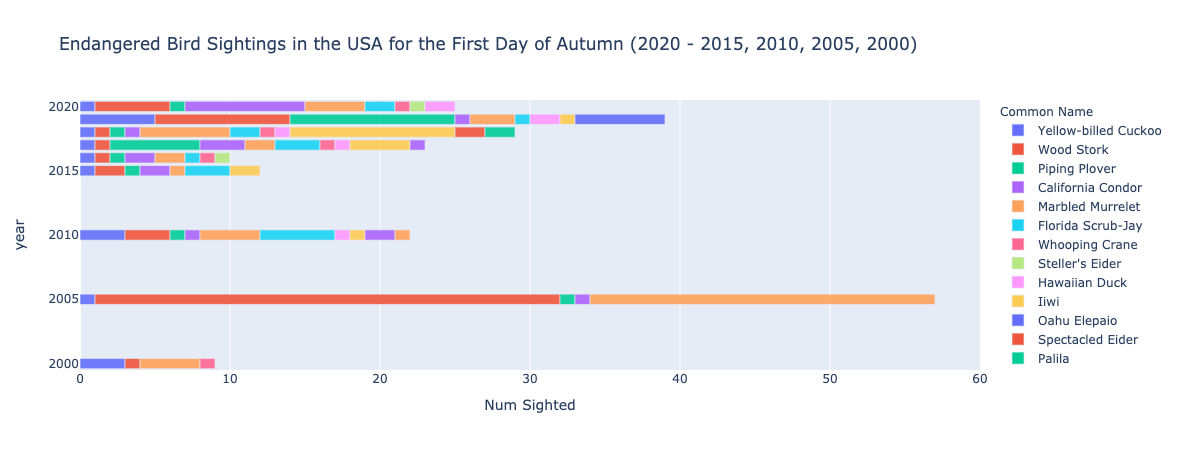

In [13]:
barchart = px.bar(
    endangered_usa_fall_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in the USA for the First Day of Autumn (2020 - 2015, 2010, 2005, 2000)",
)
barchart

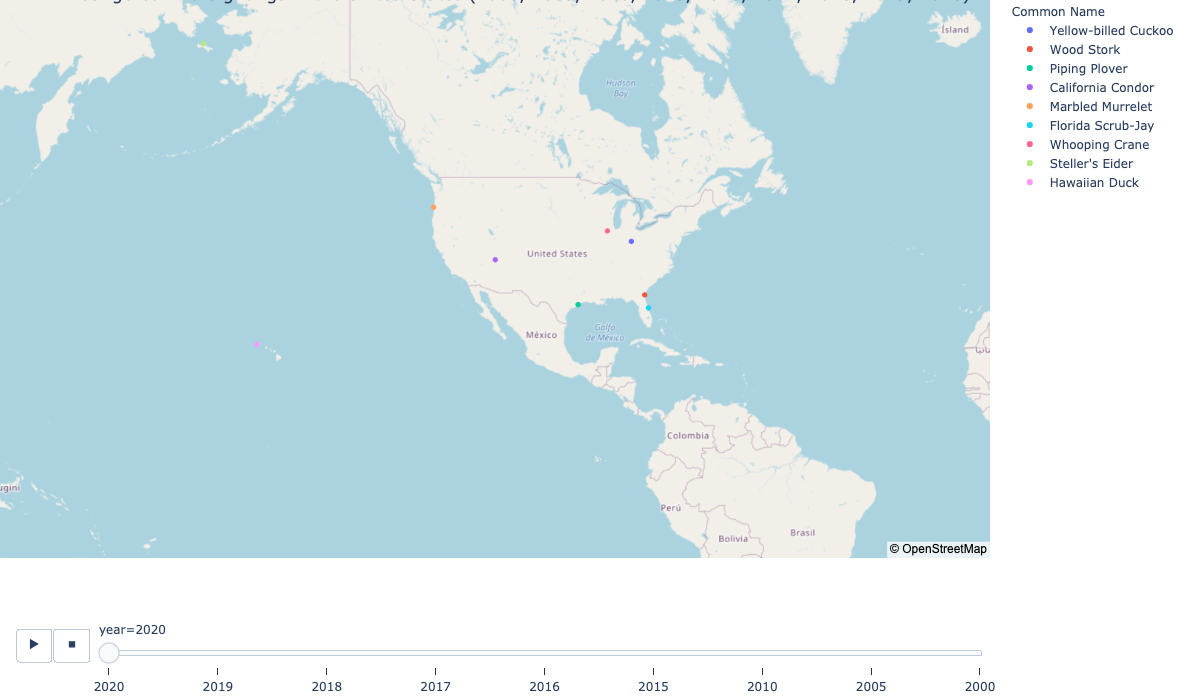

In [14]:
fig = px.scatter_mapbox(
    endangered_usa_fall_df,
    lat="Latitude",
    lon="Longitude",
    color="Common Name",
    hover_data=["Common Name", "Scientific Name", "Location Name", "year"],
    title="Endangered Bird Sightings in the United States (2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020)",
    height=700,
    mapbox_style="stamen-terrain",
    zoom=1.8,
    animation_frame="year",
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

![Endangered Header](Resources/Images/Endangered_Bird_Header.png)